In [2]:
from collections import OrderedDict, defaultdict
from copy import deepcopy
from pathlib import Path
from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np
import torch


def sort_dict_recursive(d):
    if isinstance(d, dict):
        return OrderedDict(sorted((k, sort_dict_recursive(v)) for k, v in d.items()))
    elif isinstance(d, defaultdict):
        return defaultdict(type(d), ((k, sort_dict_recursive(v)) for k, v in d.items()))
    else:
        return d


def plot_rows_on_subfigures(*arrays, labels=None):
    IN_ROW_NUM = 3
    arrays = deepcopy(arrays)
    for array in arrays:
        array *= 100
        prev_shape = None
        if prev_shape:
            assert array.shape == prev_shape
        else:
            prev_shape = array.shape

    num_rows = prev_shape[1]  # Corrected indexing to access rows
    num_cols = int(
        np.ceil(num_rows / IN_ROW_NUM)
    )  # Calculate the number of columns needed
    fig, axes = plt.subplots(num_cols, IN_ROW_NUM, figsize=(15, 4 * num_cols))

    # min_value = np.min(array)
    # max_value = np.max(array)

    for i in range(num_rows):
        row_index = i // IN_ROW_NUM  # Calculate the row index for subplot
        col_index = i % IN_ROW_NUM  # Calculate the column index for subplot
        x = range(num_rows)

        for a_idx, array in enumerate(arrays):
            label = labels[a_idx] if labels else a_idx
            axes[row_index, col_index].plot(array.mean(0)[i], "o-", label=label)
            axes[row_index, col_index].fill_between(
                x,
                array.mean(0)[i] - array.std(0)[i],
                array.mean(0)[i] + array.std(0)[i],
                # color="gray",
                alpha=0.2,
            )
        axes[row_index, col_index].set_title(f"Model after task {i}")
        axes[row_index, col_index].set_xlabel("Task")
        axes[row_index, col_index].set_ylabel(r"% signs changed ")
        axes[row_index, col_index].set_xticks(x)
        # axes[row_index, col_index].set_ylim(min_value, max_value)  # Set y-axis limits
        axes[row_index, col_index].legend(
            loc="upper left", fontsize="small"
        )  # Show legend
        axes[row_index, col_index].grid()

    axes = axes.flatten() if not num_cols == 1 else axes

    # Calculate the number of subplots available
    subplots_available = num_cols * IN_ROW_NUM

    # Remove the unnecessary subplots
    for i in range(num_rows, subplots_available):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


def plt_each_label(*arrays, labels=None):
    IN_ROW_NUM = 3
    arrays = deepcopy(arrays)
    for array in arrays:
        array *= 100
        prev_shape = None
        if prev_shape:
            assert array.shape == prev_shape
        else:
            prev_shape = array.shape

    num_rows = prev_shape[1]  # Corrected indexing to access rows
    num_cols = int(
        np.ceil(num_rows / IN_ROW_NUM)
    )  # Calculate the number of columns needed
    fig, axes = plt.subplots(num_cols, IN_ROW_NUM, figsize=(15, 4 * num_cols))

    # min_value = np.min(array)
    # max_value = np.max(array)
    for i in range(num_rows):
        row_index = i // IN_ROW_NUM  # Calculate the row index for subplot
        col_index = i % IN_ROW_NUM  # Calculate the column index for subplot
        x = range(num_rows)

        for a_idx, array in enumerate(arrays):
            label = labels[a_idx] if labels else a_idx
            axes[row_index, col_index].plot(array.mean(0)[i], "o-", label=label)
            axes[row_index, col_index].fill_between(
                x,
                array.mean(0)[i] - array.std(0)[i],
                array.mean(0)[i] + array.std(0)[i],
                # color="gray",
                alpha=0.2,
            )
        axes[row_index, col_index].set_title(f"Model after task {i}")
        axes[row_index, col_index].set_xlabel("Task")
        axes[row_index, col_index].set_ylabel(r"% signs changed ")
        axes[row_index, col_index].set_xticks(x)
        # axes[row_index, col_index].set_ylim(min_value, max_value)  # Set y-axis limits
        axes[row_index, col_index].legend(
            loc="upper left", fontsize="small"
        )  # Show legend
        axes[row_index, col_index].grid()

    axes = axes.flatten() if not num_cols == 1 else axes

    # Calculate the number of subplots available
    subplots_available = num_cols * IN_ROW_NUM

    # Remove the unnecessary subplots
    for i in range(num_rows, subplots_available):
        fig.delaxes(axes[i])

    plt.tight_layout()
    plt.show()


def dict_to_array(od, n_class_per_task=2):
    shape = (n_class_per_task, 5, 5)
    array = np.zeros(shape)
    for task_id, vals in od.items():
        if len(vals) == 0:
            break
        array[:, task_id, task_id + 1 :] = torch.stack(vals, 1)
    return array

[PosixPath('sign_mass_results/2024/03.21/cifar100_fixed_ewc/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.21/cifar100_fixed_finetuning/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.21/cifar100_fixed_lwf/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.22/cifar100_fixed_finetuning/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.26/cifar100_fixed_finetuning_reg_deeper/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.26/cifar100_fixed_finetuning_reg_fc/sign.pkl')]


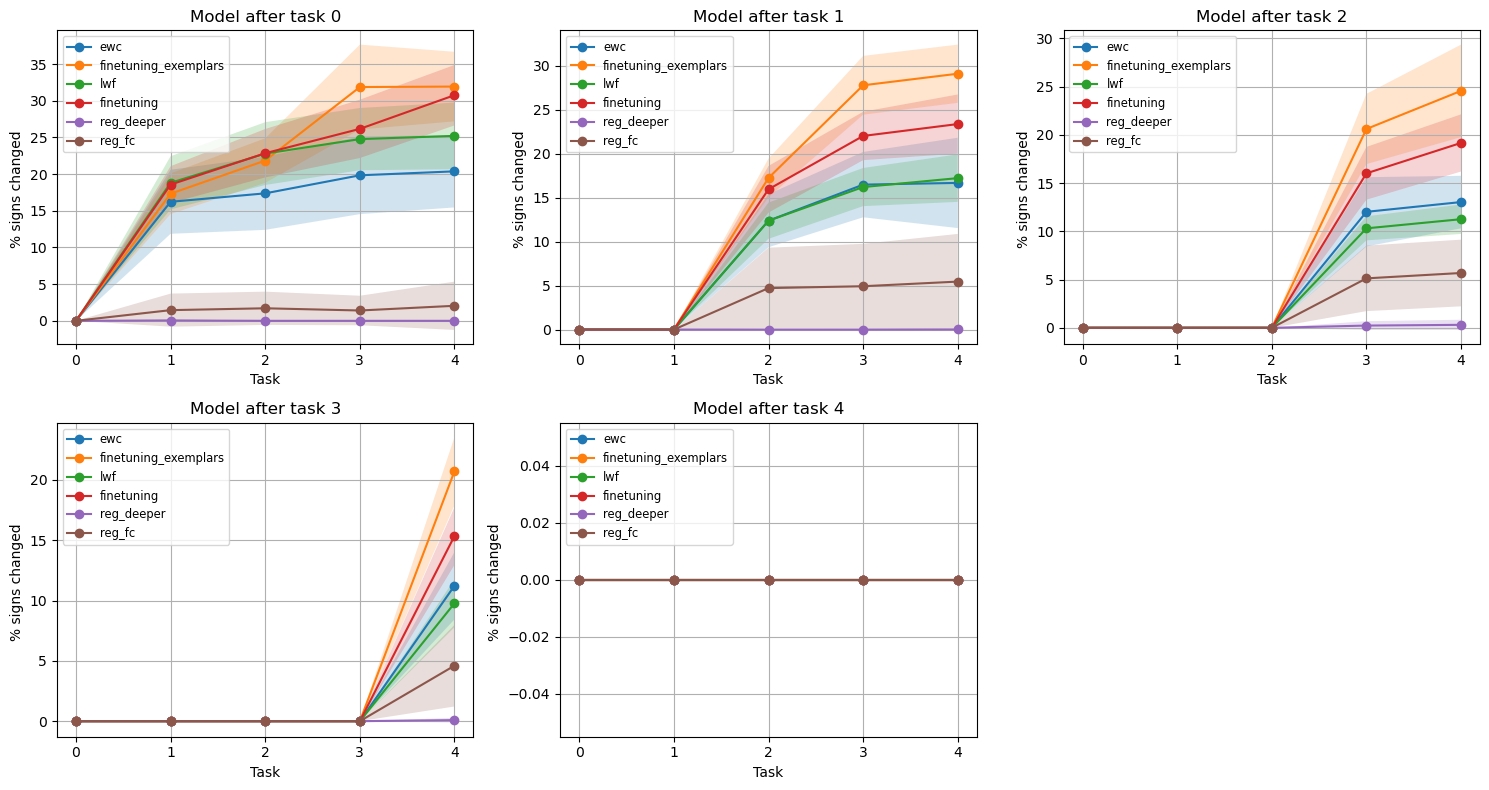

In [4]:
root = Path("sign_mass_results")
paths = sorted(list(root.rglob("*cifar100_*/*.pkl")))
pprint(paths)
arrays = []

for path in paths:
    ckpt = torch.load(path)
    # od = sort_dict_recursive(ckpt)

    array = dict_to_array(ckpt, n_class_per_task=20)
    arrays.append(array)

# labels_cifar10 = ["reg_deeper", "reg_fc", "noreg", "exemplars", "lwf"]
labels_cfiar100 = [
    "ewc",
    "finetuning_exemplars",
    "lwf",
    "finetuning",
    "reg_deeper",
    "reg_fc",
]  # [path.parts[-2].replace("cifar100_", "") for path in paths]
# plot_rows_on_subfigures(*arrays, labels=labels_cfiar100)
plt_each_label(*arrays, labels=labels_cfiar100)

[PosixPath('sign_mass_results/2024/03.14/cifar10_fixed_finetuning_.*after_relu|fc$:var_0.64:cov_12.8/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.14/cifar10_fixed_finetuning_fc$:var_0.64:cov_12.8/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.14/cifar10_fixed_finetuning_noreg/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.21/cifar10_fixed_finetuning/sign.pkl'),
 PosixPath('sign_mass_results/2024/03.22/cifar10_fixed_lwf/sign.pkl')]


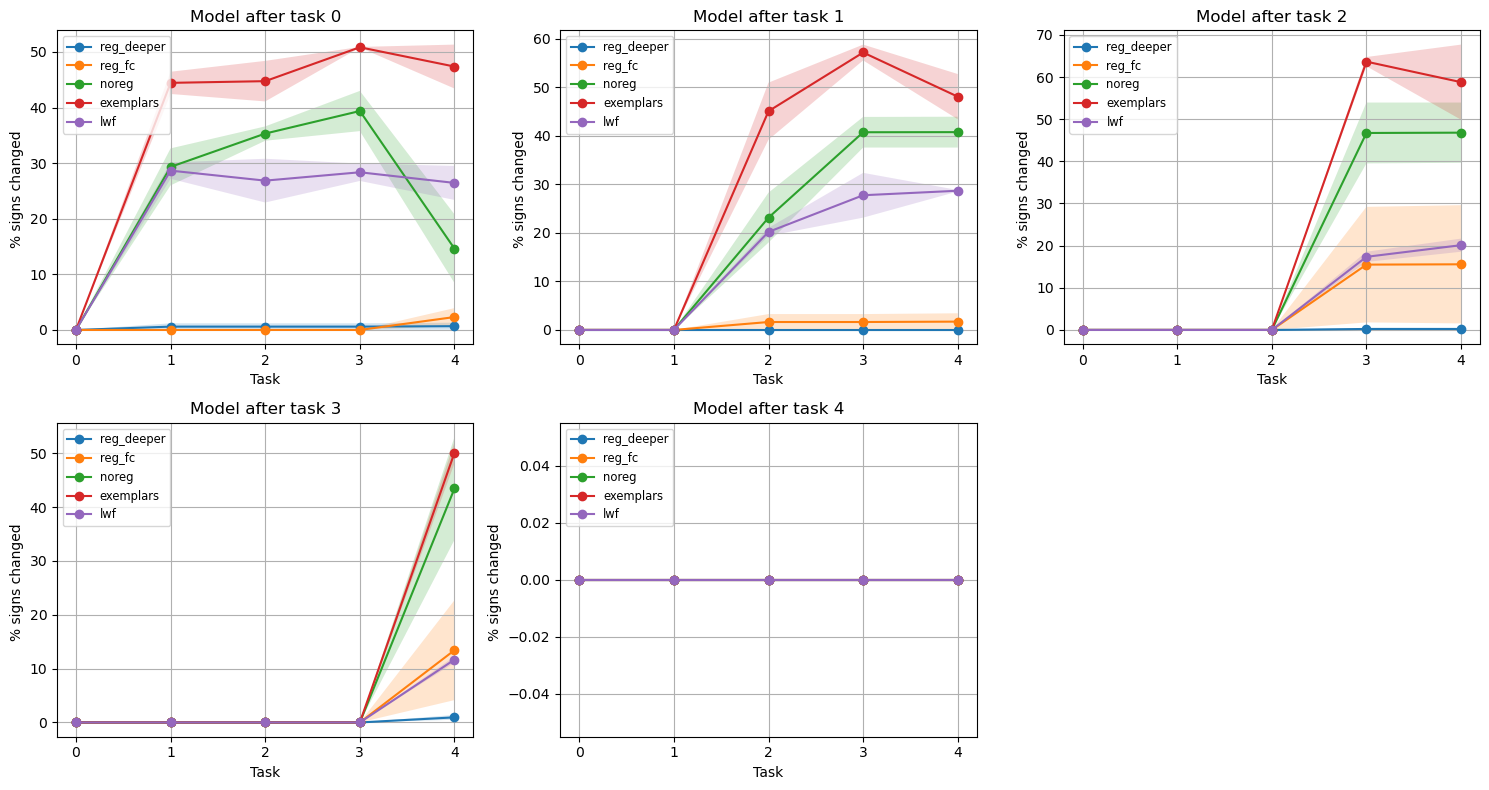

In [288]:
root = Path("sign_mass_results")
paths = sorted(list(root.rglob("*cifar10_*/*.pkl")))
pprint(paths)
arrays = []

for path in paths:
    ckpt = torch.load(path)
    # od = sort_dict_recursive(ckpt)

    array = dict_to_array(ckpt, n_class_per_task=2)
    arrays.append(array)

labels_cifar10 = ["reg_deeper", "reg_fc", "noreg", "exemplars", "lwf"]
labels_cfiar100 = [
    "ewc",
    "finetuning_exemplars",
    "lwf",
    "finetuning",
]  # [path.parts[-2].replace("cifar100_", "") for path in paths]
# plot_rows_on_subfigures(*arrays, labels=labels_cfiar100)
plt_each_label(*arrays, labels=labels_cifar10)

In [229]:
def dict_to_array(od, n_class_per_task=2):
    shape = (n_class_per_task, 5, 5)
    array = np.zeros(shape)
    for task, vals in od.items():
        for nth_label, sub_d in enumerate(vals):
            print(sub_d.shape)
            print(array[:, nth_label, task + 1 :].shape)
            # for i in enumerate(sub_d):
            # print(vals)
            # print(nth_label)
            # [task][task + 1 :] = sub_d
    # return array

In [271]:
ar = np.zeros((2, 5, 5))
ar[:, 0, 0:]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [234]:
ckpt = torch.load(path)

# od = sort_dict_recursive(ckpt)

# array = dict_to_array(ckpt, n_class_per_task=2)

In [251]:
torch.stack(ckpt[1], 1)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [279]:
n_class_per_task = 2
shape = (n_class_per_task, 5, 5)
array = np.zeros(shape)
for task_id, vals in ckpt.items():
    if len(vals) == 0:
        break

    print(torch.stack(vals, 1))
    print(array[:, task_id, task_id + 1 :])
    array[:, task_id, task_id + 1 :] = torch.stack(vals, 1)

tensor([[0.0120, 0.0120, 0.0120, 0.0130],
        [0.0000, 0.0000, 0.0000, 0.0005]])
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]]
tensor([[0., 0., 0.],
        [0., 0., 0.]])
[[0. 0. 0.]
 [0. 0. 0.]]
tensor([[0.0047, 0.0047],
        [0.0000, 0.0000]])
[[0. 0.]
 [0. 0.]]
tensor([[0.0139],
        [0.0050]])
[[0.]
 [0.]]


In [280]:
array

array([[[0.        , 0.01196835, 0.01196835, 0.01196835, 0.01304989],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.00473182, 0.00473182],
        [0.        , 0.        , 0.        , 0.        , 0.01393691],
        [0.        , 0.        , 0.        , 0.        , 0.        ]],

       [[0.        , 0.        , 0.        , 0.        , 0.00052382],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.00499424],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]])